## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Change To The WORKING DIRECTORY
%cd /content/drive/My Drive/Colab Notebooks/Computer Vision/Project1/P1_Facial_Keypoints

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Computer Vision/Project1/P1_Facial_Keypoints


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#%cd "/content/drive/My Drive/Colab Notebooks"
#!ls
#%cd "/content/drive/My Drive/Colab Notebooks/Computer Vision"
#%cd "/content/drive/My Drive/Colab Notebooks/Computer Vision/Project1/P1_Facial_Keypoints"

#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

(500, 759, 3)


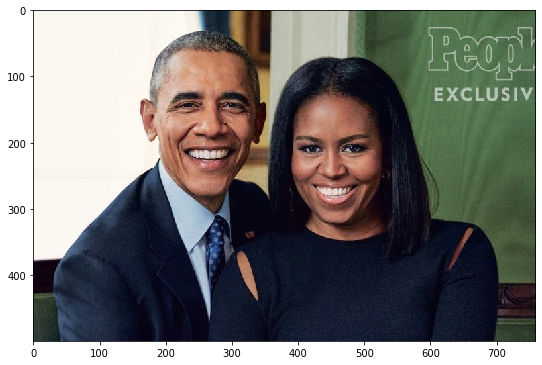

In [74]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

print(image.shape)
# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


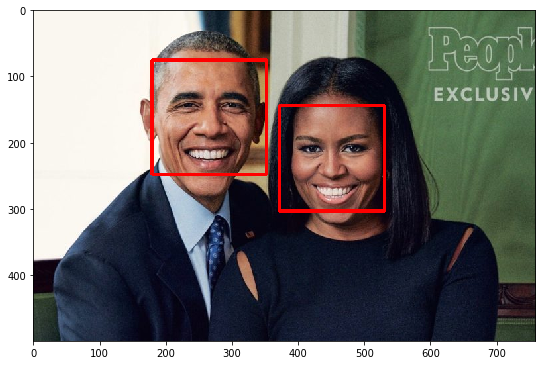

In [75]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [33]:
# install Pydrive
!pip install pydrive --upgrade

# Load the Drive helper and mount
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Requirement already up-to-date: pydrive in /usr/local/lib/python3.6/dist-packages (1.3.1)


In [0]:
model_module = drive.CreateFile({'id':'1XYcj9VfDMY1rs9uAUCK2cJnaKTRUSZUP'})
model_module.GetContentFile('models.py')

data_load_module = drive.CreateFile({'id':'1MFSjeq5GVPXYiKRdoFuufYeD46MVshzt'})
data_load_module.GetContentFile('data_load.py')


In [17]:
import torch
from models import NaimishNet

net = NaimishNet()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('saved_models/keypoints_model_1.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

NaimishNet(
  (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=43264, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=136, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (dropout3): Dropout(p=0.3, inplace=False)
  (dropout4): Dropout(p=0.4, inplace=False)
  (dropout5): Dropout(p=0.5, inplace=False)
  (dropout6): Dropout(p=0.6, inplace=False)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




In [0]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=40, marker='.', c='m')

(273, 253, 3)


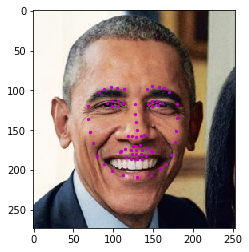

(259, 239, 3)


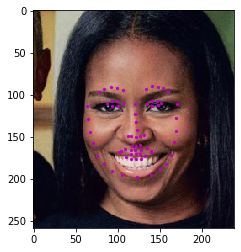

In [78]:
image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y-50:y+h+50, x-40:x+w+40] # the numeric values are needed for scaling the output keypoints correctly.
    width_roi = roi.shape[1] # needed later for scaling keypoints
    height_roi = roi.shape[0] # needed later for scaling keypoints
    roi_copy = np.copy(roi) # will be used as background to display final keypoints.
    print(roi.shape)

    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi/255.0
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))  # resize the image to get a square 224*224 image.
    roi = np.reshape(roi,(224, 224, 1)) # reshape after rescaling to add the third color dimension.
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = roi.transpose(2, 0, 1)
    #print(roi.shape)
     ## TODO: Make facial keypoint predictions using your loaded, trained network 
    roi = torch.from_numpy(roi).type(torch.FloatTensor) # convert images to FloatTensors (common source of error)
    #print(roi.shape)

    # Runtime error : expected stride to be a single integer value or a list of 1 values to match the convolution dimensions, 
    # but got stride=[1, 1].
    #This error will occur if the following line is omitted. Hence we need to apply unsqueeze operation.
    roi = roi.unsqueeze(0)
    #print(roi.shape)

    # Pass the transformed input images to the network for detecting keypoints.
    keypoints = net(roi)
    keypoints = keypoints.view(68, 2)
    
    # Undo the transformations performed on the facial keypoints
    keypoints = keypoints.data.numpy() #convert back to numpy
    keypoints = keypoints*50.0 + 100 #undo normalization of keypoints
    
    ## TODO: Display each detected face and the corresponding keypoints        
    keypoints = keypoints * (width_roi / 224, height_roi / 218) # scale the keypoints to match the size of the output display.
    plt.figure() 
     
    # Using helper function for display as defined previously.  
    show_all_keypoints(roi_copy, keypoints)
    plt.show()

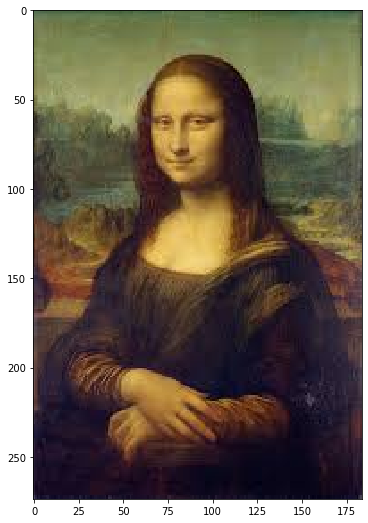

In [79]:
import cv2
# load in color image for face detection
image1 = cv2.imread('images/mona_lisa.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image1)

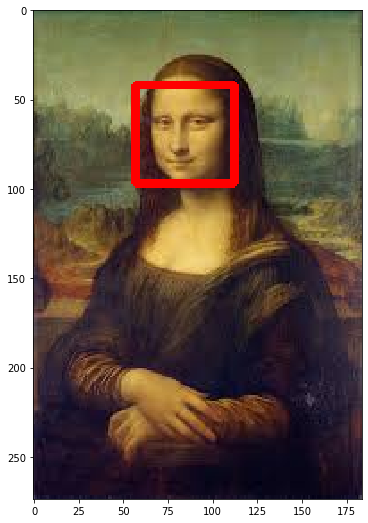

In [80]:

# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image1, 1.3, 4)

# make a copy of the original image to plot detections on
image_with_detections = image1.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)


(75, 71, 3)
torch.Size([1, 1, 224, 224])


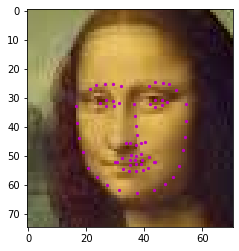

In [81]:
image_copy = np.copy(image1)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    #roi = image_copy
    #roi = image_copy[y:y + int(1.5 * h), x - int(0.4 * w):x + int(1.1 * w)]

    roi = image_copy[y-10:y+h+10, x-8:x+w+8] # the numeric values are needed for scaling the output keypoints correctly.
    width_roi = roi.shape[1] # needed later for scaling keypoints
    height_roi = roi.shape[0] # needed later for scaling keypoints
    roi_copy = np.copy(roi) # will be used as background to display final keypoints.
    
    print(roi.shape)
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi/255.0
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))  # resize the image to get a square 224*224 image.
    roi = np.reshape(roi,(224, 224, 1)) # reshape after rescaling to add the third color dimension.
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = roi.transpose(2, 0, 1)
    #print(roi.shape)
     ## TODO: Make facial keypoint predictions using your loaded, trained network 
    roi = torch.from_numpy(roi).type(torch.FloatTensor) # convert images to FloatTensors (common source of error)
    #print(roi.shape)

    # Runtime error : expected stride to be a single integer value or a list of 1 values to match the convolution dimensions, 
    # but got stride=[1, 1].
    #This error will occur if the following line is omitted. Hence we need to apply unsqueeze operation.
    roi = roi.unsqueeze(0)
    print(roi.shape)

    # Pass the transformed input images to the network for detecting keypoints.
    keypoints = net(roi)
    keypoints = keypoints.view(68, 2)
    
    # Undo the transformations performed on the facial keypoints
    keypoints = keypoints.data.numpy() #convert back to numpy
    keypoints = keypoints*60.0 + 100 #undo normalization of keypoints
    
    ## TODO: Display each detected face and the corresponding keypoints        
    keypoints = keypoints * (width_roi / 224, height_roi / 215) # scale the keypoints to match the size of the output display.
    plt.figure() 
     
    # Using helper function for display as defined previously.  
    show_all_keypoints(roi_copy, keypoints)
    plt.show()

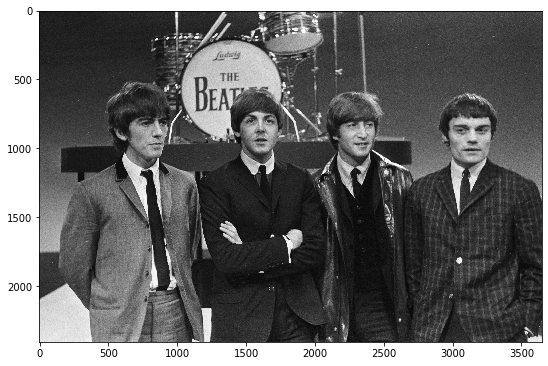

In [84]:
import cv2
# load in color image for face detection
image2 = cv2.imread('images/the_beatles.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image2)

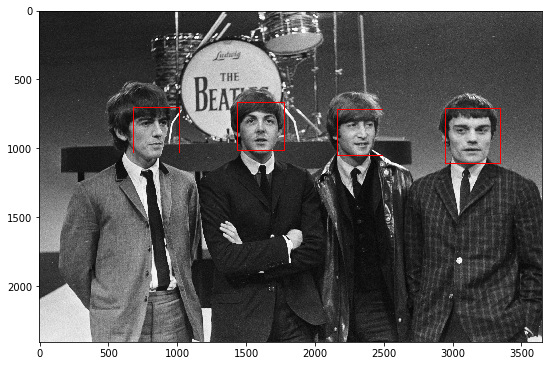

In [86]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.3, 5)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

(365, 353, 3)
torch.Size([1, 1, 224, 224])


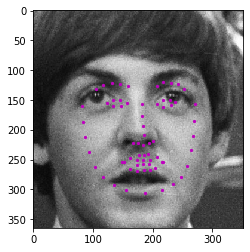

(351, 339, 3)
torch.Size([1, 1, 224, 224])


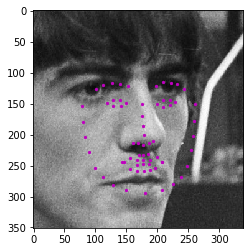

(420, 408, 3)
torch.Size([1, 1, 224, 224])


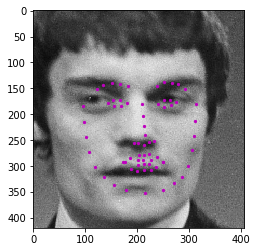

(351, 339, 3)
torch.Size([1, 1, 224, 224])


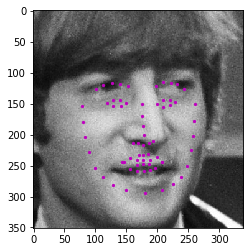

In [88]:
image_copy = np.copy(image2)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    #roi = image_copy
    #roi = image_copy[y:y + int(1.5 * h), x - int(0.4 * w):x + int(1.1 * w)]

    roi = image_copy[y-10:y+h+10, x-4:x+w+4] # the numeric values are needed for scaling the output keypoints correctly.
    width_roi = roi.shape[1] # needed later for scaling keypoints
    height_roi = roi.shape[0] # needed later for scaling keypoints
    roi_copy = np.copy(roi) # will be used as background to display final keypoints.
    
    print(roi.shape)
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi/255.0
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))  # resize the image to get a square 224*224 image.
    roi = np.reshape(roi,(224, 224, 1)) # reshape after rescaling to add the third color dimension.
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = roi.transpose(2, 0, 1)
    #print(roi.shape)
     ## TODO: Make facial keypoint predictions using your loaded, trained network 
    roi = torch.from_numpy(roi).type(torch.FloatTensor) # convert images to FloatTensors (common source of error)
    #print(roi.shape)

    # Runtime error : expected stride to be a single integer value or a list of 1 values to match the convolution dimensions, 
    # but got stride=[1, 1].
    #This error will occur if the following line is omitted. Hence we need to apply unsqueeze operation.
    roi = roi.unsqueeze(0)
    print(roi.shape)

    # Pass the transformed input images to the network for detecting keypoints.
    keypoints = net(roi)
    keypoints = keypoints.view(68, 2)
    
    # Undo the transformations performed on the facial keypoints
    keypoints = keypoints.data.numpy() #convert back to numpy
    keypoints = keypoints*60.0 + 100 #undo normalization of keypoints
    
    ## TODO: Display each detected face and the corresponding keypoints        
    keypoints = keypoints * (width_roi / 224, height_roi / 215) # scale the keypoints to match the size of the output display.
    plt.figure() 
     
    # Using helper function for display as defined previously.  
    show_all_keypoints(roi_copy, keypoints)
    plt.show()